In [12]:
import pandas as pd
import numpy as np


df = pd.read_csv('~/Downloads/Auto.csv')
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)
df['muscle'] = df['horsepower'].apply(lambda x: 0 if x < np.mean(df['horsepower']) else 1)

train_len = int(len(df) * 0.8)
train = df.iloc[:train_len]
test = df.iloc[train_len:]

/Users/esten/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


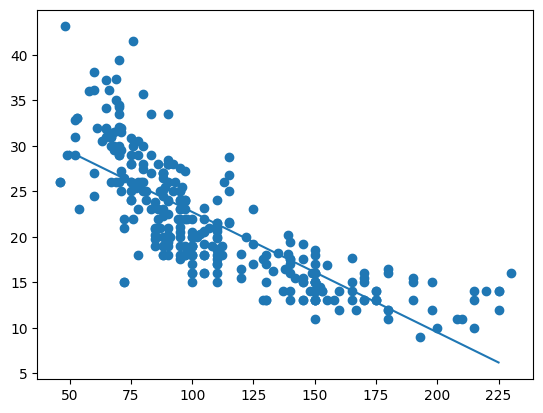

In [15]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(train[['horsepower']], train['mpg'])

import matplotlib.pyplot as plt

plt.scatter(train['horsepower'], train['mpg'])
plt.plot([50, 225], model.predict(np.asarray([[50], [225]])))
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error


train_mae = mean_absolute_error(train['mpg'], model.predict(train[['horsepower']]))
print(train_mae)

3.184899842903158


In [17]:
test_mae = mean_absolute_error(test['mpg'], model.predict(test[['horsepower']]))
print(test_mae)

6.931096364471544
